In [1]:
import numpy as np
import time
import pandas as pd
import time
import pickle
from IPython.display import clear_output
import urllib
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
users_game = pd.read_csv('./data/users_game.csv')
games = pd.read_csv('./data/games.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9892\3280684446.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  users_game = pd.read_csv('./data/users_game.csv')


## Pre-processing

In [61]:
users_game.dtypes

user             object
appid             int64
hours_forever    object
name             object
dtype: object

In [62]:
users_game['hours_forever'].unique()

array(['1,466', '1,434', '674', ..., 1382.0, 758.0, 1572.0], dtype=object)

In [63]:
users_game['hours_forever'] = users_game['hours_forever'].apply(lambda x: float(x.replace(",","")) if (type(x)==str) else x)

In [106]:
users_game.dtypes

user              object
appid              int64
hours_forever    float64
name              object
dtype: object

In [64]:
games.dtypes

url                 object
title               object
genre               object
Release Date        object
tags                object
total_reviews        int64
positive_reviews     int64
negative_reviews     int64
price               object
dtype: object

In [65]:
games['appid'] = games['url'].apply(lambda x: int(x.split("/")[4]))
games = games.drop(["url"], axis=1)

In [66]:
games["release_date"] = pd.to_datetime(games["Release Date"], infer_datetime_format= True)
games = games.drop(["Release Date"], axis=1)

In [71]:
games.price = games.price.apply(lambda x: int(x) if (type(x)==str and x != 'Free' and x != np.nan) else x)
games['price'] = games['price'].replace({'Free':0})

In [76]:
games.dtypes

title                       object
genre                       object
tags                        object
total_reviews                int64
positive_reviews             int64
negative_reviews             int64
price                      float64
appid                        int64
release_date        datetime64[ns]
dtype: object

In [82]:
tags_dummies = games.tags.apply(lambda x: ",".join([i.strip() for i in x[1:-1].replace('\'',"").replace("\"","").split(",")])).str.get_dummies(",")

In [84]:
tags_dummies.shape, games.shape

((7093, 426), (7093, 9))

In [87]:
games = pd.concat([games, tags_dummies], axis=1)
games = games.drop(['tags'], axis=1)

In [93]:
games = games.drop(['genre'], axis=1)

In [138]:
print("Games dataframe:")
miss = price [games.isnull().any()[games.isnull().any()].index].isnull().astype('int').sum()
for i in miss.index:
    print(i,"has ",miss[i]," missing values")

Games dataframe:
price has  432  missing values
release_date has  10  missing values


In [139]:
print("Users-Games dataframe:")
miss = users_game[users_game.isnull().any()[users_game.isnull().any()].index].isnull().astype('int').sum()
for i in miss.index:
    print(i,"has ",miss[i]," missing values")

Users-Games dataframe:
hours_forever has  1819347  missing values
name has  889  missing values


In [140]:
users_game = users_game.drop(['name'], axis=1)

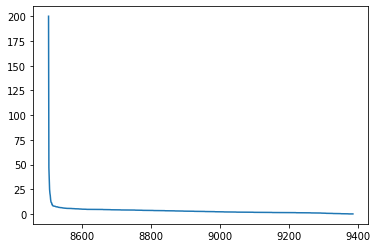

In [156]:
user = users_game.user.unique()[20]
plt.plot(users_game[users_game['user']==user]['hours_forever'])

## Questions
#1
#2
#3
#4
#5